In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import plothist
import h5py
from offline_step.reader import *

In [2]:
# load_and_plot_hitmap("offline_step/test.h5",event_key="42")  
with h5py.File("offline_step/test.h5", "r") as f:
    print("Top-level keys:", list(f.keys()))
    event = list(f.keys())[0]
    print("Keys inside first event:", list(f[event].keys()))
    print("Shape of 'coords':", f[event]["coords"].shape)
    print("Example values:\n", f[event]["coords"][:5])


Top-level keys: ['evt0_x60_y60', 'evt0_x60_y80', 'evt0_x80_y100', 'evt0_x80_y80', 'evt10_x100_y100', 'evt10_x100_y60', 'evt10_x120_y60', 'evt10_x120_y80', 'evt10_x80_y60', 'evt10_x80_y80', 'evt11_x100_y100', 'evt11_x100_y80', 'evt12_x100_y80', 'evt12_x80_y80', 'evt13_x100_y100', 'evt13_x100_y80', 'evt13_x80_y100', 'evt14_x100_y100', 'evt14_x100_y120', 'evt14_x100_y80', 'evt14_x80_y120', 'evt15_x100_y100', 'evt15_x100_y80', 'evt15_x80_y100', 'evt16_x60_y100', 'evt16_x60_y60', 'evt16_x60_y80', 'evt16_x80_y100', 'evt16_x80_y80', 'evt17_x100_y80', 'evt17_x20_y140', 'evt17_x40_y100', 'evt17_x40_y120', 'evt17_x40_y140', 'evt17_x60_y100', 'evt17_x80_y100', 'evt17_x80_y80', 'evt18_x100_y100', 'evt18_x60_y100', 'evt18_x80_y100', 'evt19_x100_y100', 'evt19_x100_y80', 'evt19_x80_y100', 'evt1_x100_y100', 'evt1_x100_y80', 'evt1_x40_y80', 'evt1_x60_y80', 'evt1_x80_y100', 'evt1_x80_y80', 'evt20_x80_y60', 'evt20_x80_y80', 'evt21_x100_y100', 'evt21_x100_y120', 'evt21_x100_y80', 'evt22_x100_y100', 'evt22

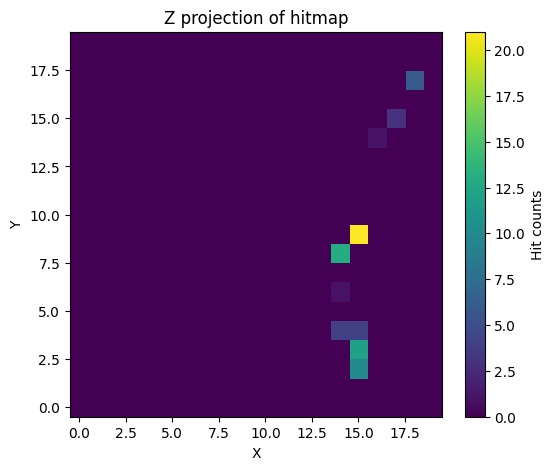

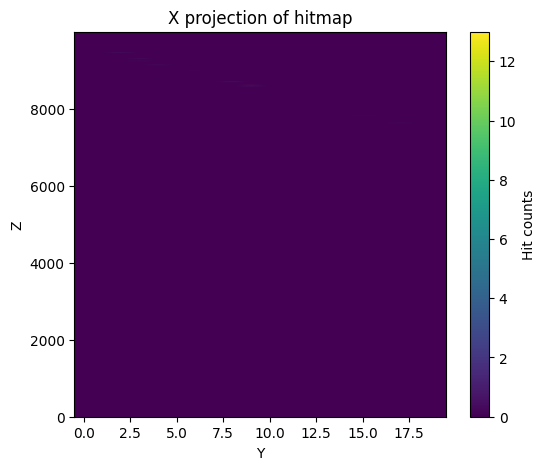

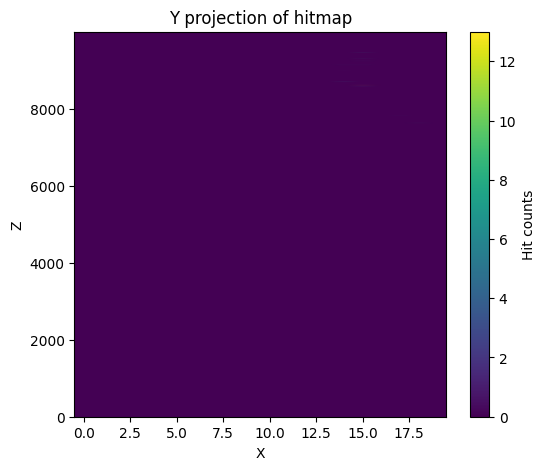

In [7]:
file_path = "offline_step/test.h5"  # Adjust path if needed
event_key = "evt0_x60_y80"  # Use an existing event/tile name

coords, counts, shape = load_sparse_event(file_path, event_key)
hitmap = build_dense_hitmap(coords, counts, shape)

plot_projection(hitmap, axis='z')  # XY
plot_projection(hitmap, axis='x')  # YZ
plot_projection(hitmap, axis='y')  # XZ

In [4]:
file = uproot.open("build/TPC_pi.root")
tree = file["HitNtuple"]

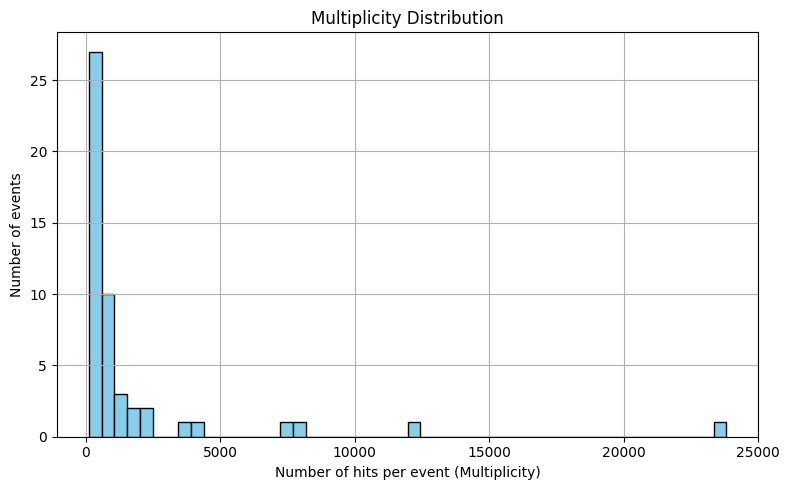

In [5]:
from collections import Counter
# Read EventID branch
event_ids = tree["EventID"].array(library="np")

# Count hits per EventID (i.e., multiplicity)
from collections import Counter
multiplicity = Counter(event_ids)

# Plot histogram of multiplicity
plt.figure(figsize=(8,5))
plt.hist(list(multiplicity.values()), bins=50, color='skyblue', edgecolor='black')
plt.xlabel("Number of hits per event (Multiplicity)")
plt.ylabel("Number of events")
plt.title("Multiplicity Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
variables = [
    "charge", "prePos_x", "prePos_y", "prePos_z",
    "driftTime_notSmeared","StepLength","Gtime","HitPathLength_fromTrack",
    "postPos_x","postPos_y","postPos_z","EventID"                                                                                                                      
]
df = tree.arrays(variables, library="pd")   

0.9378414056809905


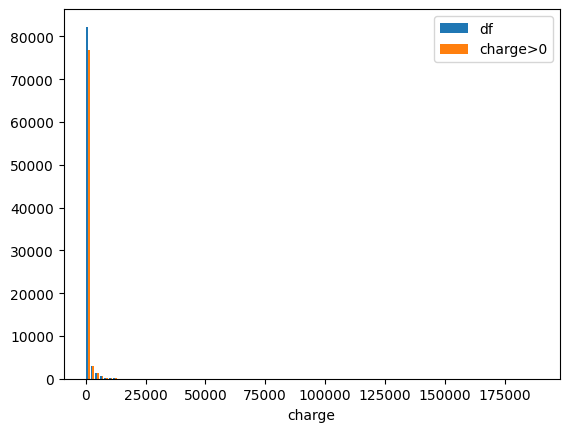

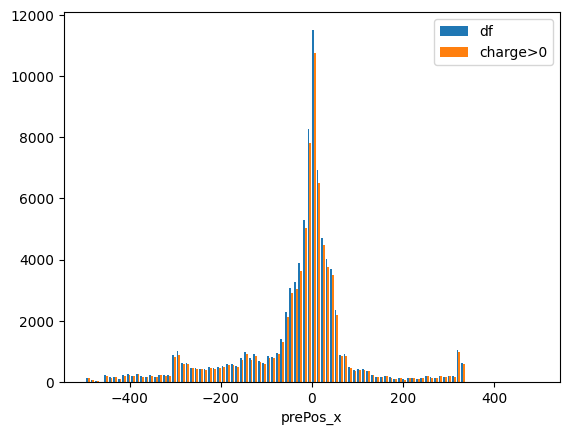

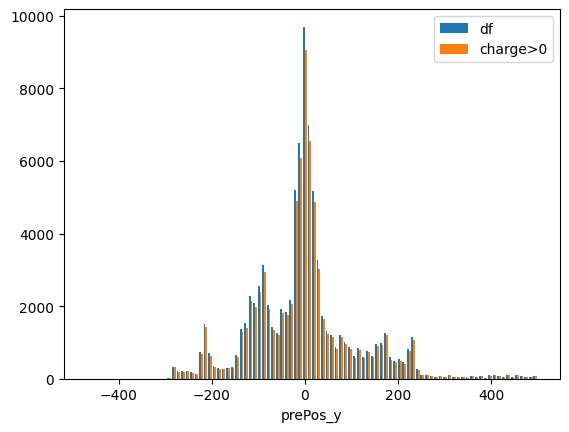

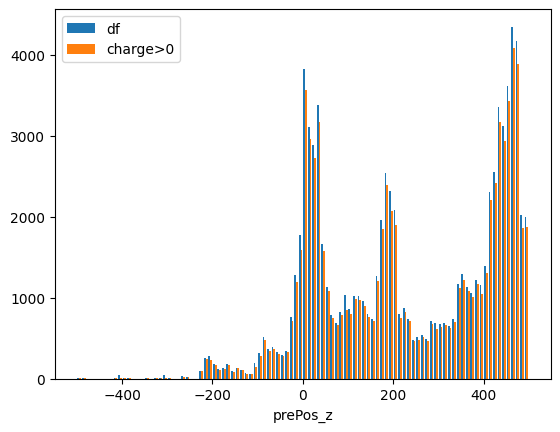

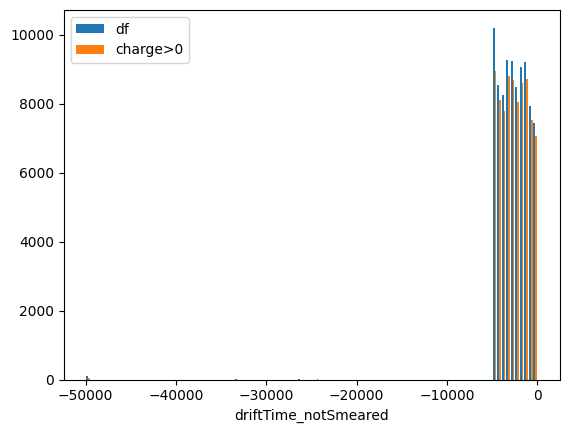

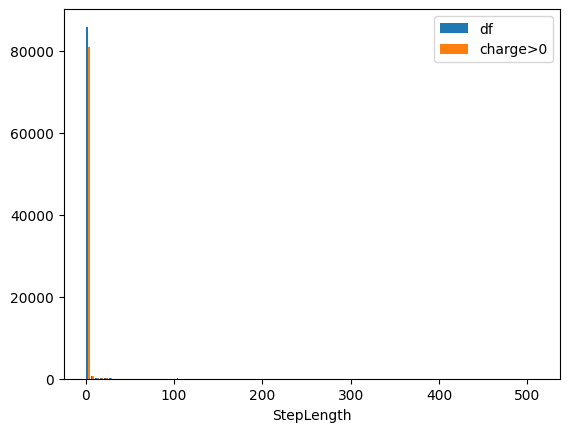

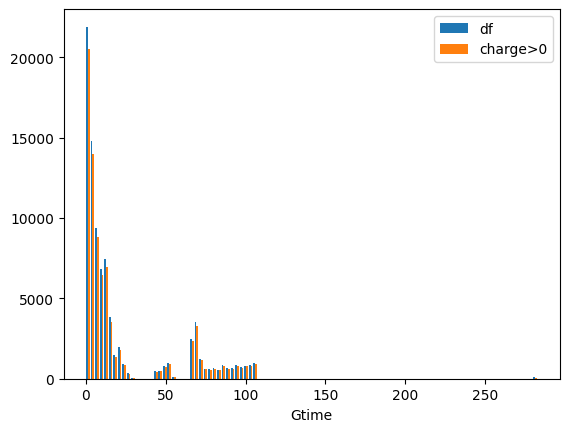

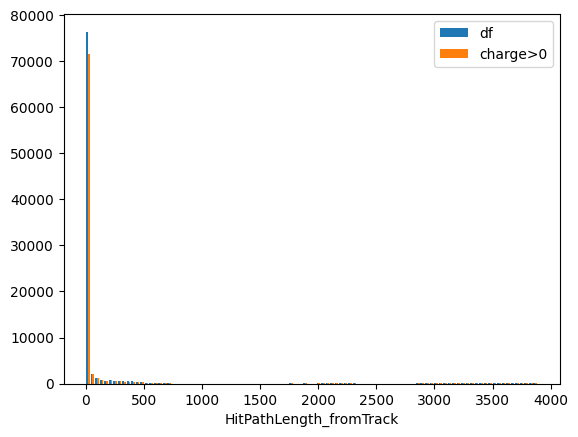

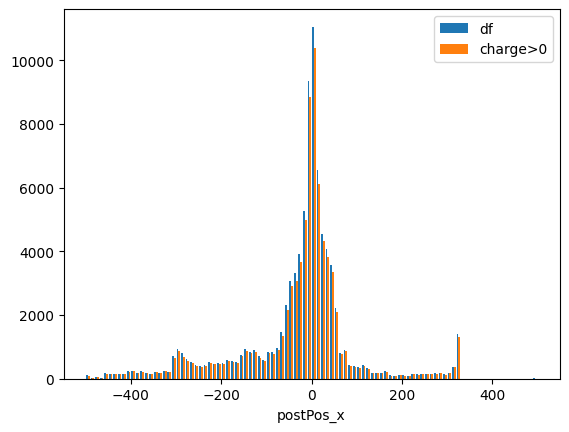

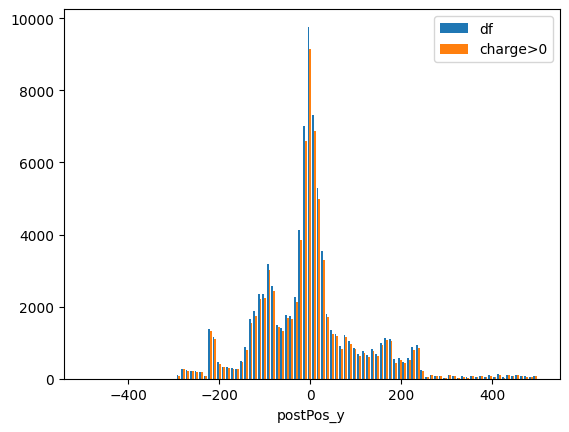

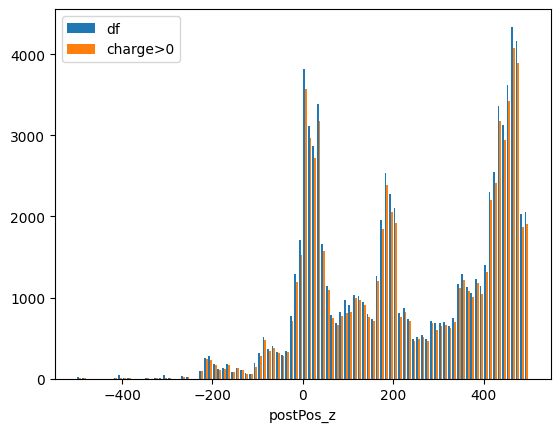

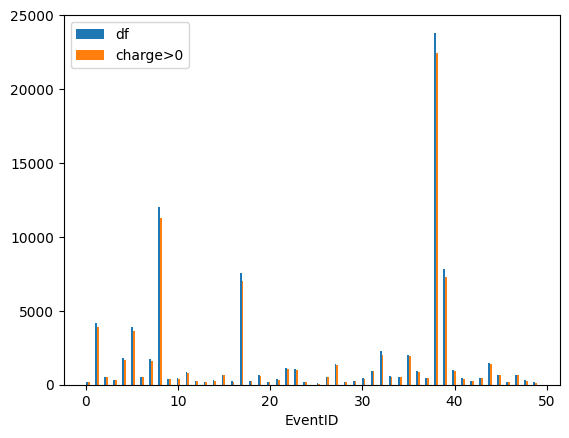

In [7]:
df_p = df.query('charge>0')
print(len(df_p)/len(df)) 
for i in df_p [0:0]:
    plt.figure()
    plt.hist([df[i],df_p[i]],label =['df', 'charge>0'], bins =100)
    plt.xlabel(i)
    plt.legend()
